# StackeAE RGB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import keras.layers as layers
from sklearn.model_selection import train_test_split
import random
import tensorflow_probability as tfp
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import RMSprop

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout, MaxPooling2D, UpSampling2D, Concatenate, InputLayer
from keras.models import Model, Sequential
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint 
from keras.utils import plot_model
import gc

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.filters import threshold_otsu
from glob import glob
from scipy import misc
from matplotlib.patches import Circle,Ellipse
from matplotlib.patches import Rectangle

In [4]:
import os
from PIL import Image
import scipy.misc
import imageio
from skimage.transform import rescale, resize
from skimage.color import lab2rgb

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import gzip

In [6]:
tf.random.set_seed(42)

# Data Augmentation

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import backend as K
import tensorflow_addons as tfa
import tensorflow as tf

'''batch_size= 8
image_size = [120, 120]


ds = image_dataset_from_directory(
    '/kaggle/input/imagedataset/data',
    labels=None,
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    color_mode='grayscale'
)

def convert_to_float(image):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image


def trans1(img):
    return tfa.image.rotate(tf.image.flip_left_right(tf.image.flip_up_down(img)),-.2,fill_mode="reflect",interpolation="bilinear")

def trans2(img):
    return tfa.image.rotate(img,-.2,fill_mode="reflect",interpolation="bilinear")

def trans3(img):
    return tfa.image.rotate(img,.2,fill_mode="reflect",interpolation="bilinear")
    
ds1,ds2,ds3,ds4 = ds,ds.map(trans1),ds.map(trans2),ds.map(trans3)

ds = ds1.concatenate(ds2).concatenate(ds3).concatenate(ds4)

AUTOTUNE = tf.data.experimental.AUTOTUNE
x = (
    ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)'''

'batch_size= 8\nimage_size = [120, 120]\n\n\nds = image_dataset_from_directory(\n    \'/kaggle/input/imagedataset/data\',\n    labels=None,\n    image_size=image_size,\n    interpolation=\'nearest\',\n    batch_size=batch_size,\n    shuffle=True,\n    color_mode=\'grayscale\'\n)\n\ndef convert_to_float(image):\n    image = tf.image.convert_image_dtype(image, dtype=tf.float32)\n    return image\n\n\ndef trans1(img):\n    return tfa.image.rotate(tf.image.flip_left_right(tf.image.flip_up_down(img)),-.2,fill_mode="reflect",interpolation="bilinear")\n\ndef trans2(img):\n    return tfa.image.rotate(img,-.2,fill_mode="reflect",interpolation="bilinear")\n\ndef trans3(img):\n    return tfa.image.rotate(img,.2,fill_mode="reflect",interpolation="bilinear")\n    \nds1,ds2,ds3,ds4 = ds,ds.map(trans1),ds.map(trans2),ds.map(trans3)\n\nds = ds1.concatenate(ds2).concatenate(ds3).concatenate(ds4)\n\nAUTOTUNE = tf.data.experimental.AUTOTUNE\nx = (\n    ds\n    .map(convert_to_float)\n    .cache()\n    .p

In [8]:
ab_path = "/kaggle/input/image-colorization/ab/ab/ab1.npy"
l_path = "/kaggle/input/image-colorization/l/gray_scale.npy"

In [9]:
ab_df = np.load(ab_path)[0:3000]
L_df = np.load(l_path)[0:3000]
dataset = (L_df,ab_df )
gc.collect()

66

In [10]:
rgb_df = []

In [11]:
for i in range(0,3000):
    img = np.zeros((224,224,3))
    img[:,:,0] = L_df[i]
    img[:,:,1:] = ab_df[i]
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    rgb_df.append(img)

In [12]:
rgb_df = np.array(rgb_df)

In [13]:
x = (L_df/255).astype('float32') 
y = (rgb_df/255).astype('float32') 

In [14]:
del ab_df

In [15]:
#plt.imshow(y[0])

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split( x , y , test_size=0.1, random_state=42 )

In [17]:
lr = 0.00005

In [18]:
input_img = Input(shape = (224, 224, 1))

In [19]:
def autoencoder(input_img): #functional model
    #encoder
    #input = 224 x 224 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #224 x 224 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #112 x 112 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #112 x 112 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #64 x 64 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #56 x 56 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #56 x 56 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # x 112 x 112
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(3, (3, 3), activation='softmax', padding='same')(up2) # 224 x 224 x 1
    return decoded

In [20]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop()) #compiling the model

In [21]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856 

In [22]:
def r_accuracy(img_original, img_reconstructed):
    mse = tf.reduce_mean((img_original - img_reconstructed) ** 2)
    pixel_max = 1.0
    psnr = 20 * tf.math.log(pixel_max / tf.math.sqrt(mse))/tf.math.log(10.0)
    return psnr

In [23]:
# del x
# del y
# del L_df
# del ab_df

In [24]:
history = autoencoder.fit(train_x, train_y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
85/85 [==============================] - 17s 97ms/step - loss: 0.0854
Epoch 2/100
85/85 [==============================] - 8s 91ms/step - loss: 0.0853
Epoch 3/100
85/85 [==============================] - 8s 92ms/step - loss: 0.0853
Epoch 4/100
85/85 [==============================] - 8s 91ms/step - loss: 0.0853
Epoch 5/100
85/85 [==============================] - 8s 91ms/step - loss: 0.0852
Epoch 6/100
85/85 [==============================] - 8s 91ms/step - loss: 0.0852
Epoch 7/100
85/85 [==============================] - 8s 93ms/step - loss: 0.0852
Epoch 8/100
85/85 [==============================] - 8s 91ms/step - loss: 0.0852
Epoch 9/100
85/85 [==============================] - 8s 90ms/step - loss: 0.0852
Epoch 10/100
85/85 [==============================] - 8s 91ms/step - loss: 0.0852
Epoch 11/100
85/85 [==============================] - 8s 93ms/step - loss: 0.0852
Epoch 12/100
85/85 [==============================] - 8s 91ms/step - loss: 0.0852
Epoch 13/100
85/85 [====

In [25]:
pred = autoencoder.predict(test_x)

10/10 [==============================] - 0s 29ms/step


In [26]:
import numpy as np
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim

In [27]:
# Convert the images to numpy arrays
# img1 = tf.keras.preprocessing.image.img_to_array(pred[0])
# img2 = tf.keras.preprocessing.image.img_to_array(test_y[0])
final = []
predfinal = []
for i in range(600):
    img = np.zeros((224,224,3))
    img = pred[0]*255
    #img = img.reshape(1, 224, 224, 3)
    #img = np.expand_dims(img, axis=0)

    img_y = np.zeros((224,224,3))
    img_y = test_y[0]*255
    
    final.append(img)
    predfinal.append(img_y)
#img_y = img_y.reshape(1, 224, 224, 3)
#img_y = np.expand_dims(img_y, axis=0)
img.shape

(224, 224, 3)

In [28]:
# Calculate SSIM between the two images
ssimtotal = 0
for i in range(600):
    ssim_val1 = ssim(predfinal[i,:,:,0], final[i,:,:,0])
    ssim_val2 = ssim(predfinal[i,:,:,1], final[i,:,:,0])
    ssim_val3 = ssim(predfinal[i,:,:,2], final[i,:,:,0])
    ssimtotal = ssimtotal + (ssim_val1 + ssim_val2 + ssim_val3)/3


# Print the SSIM value
print('SSIM:', ssimtotal/600)

SSIM: 0.0013830580385952144
SSIM: 0.036621525266817716
SSIM: 0.017342846473488948
SSIM: -0.04981519762452102


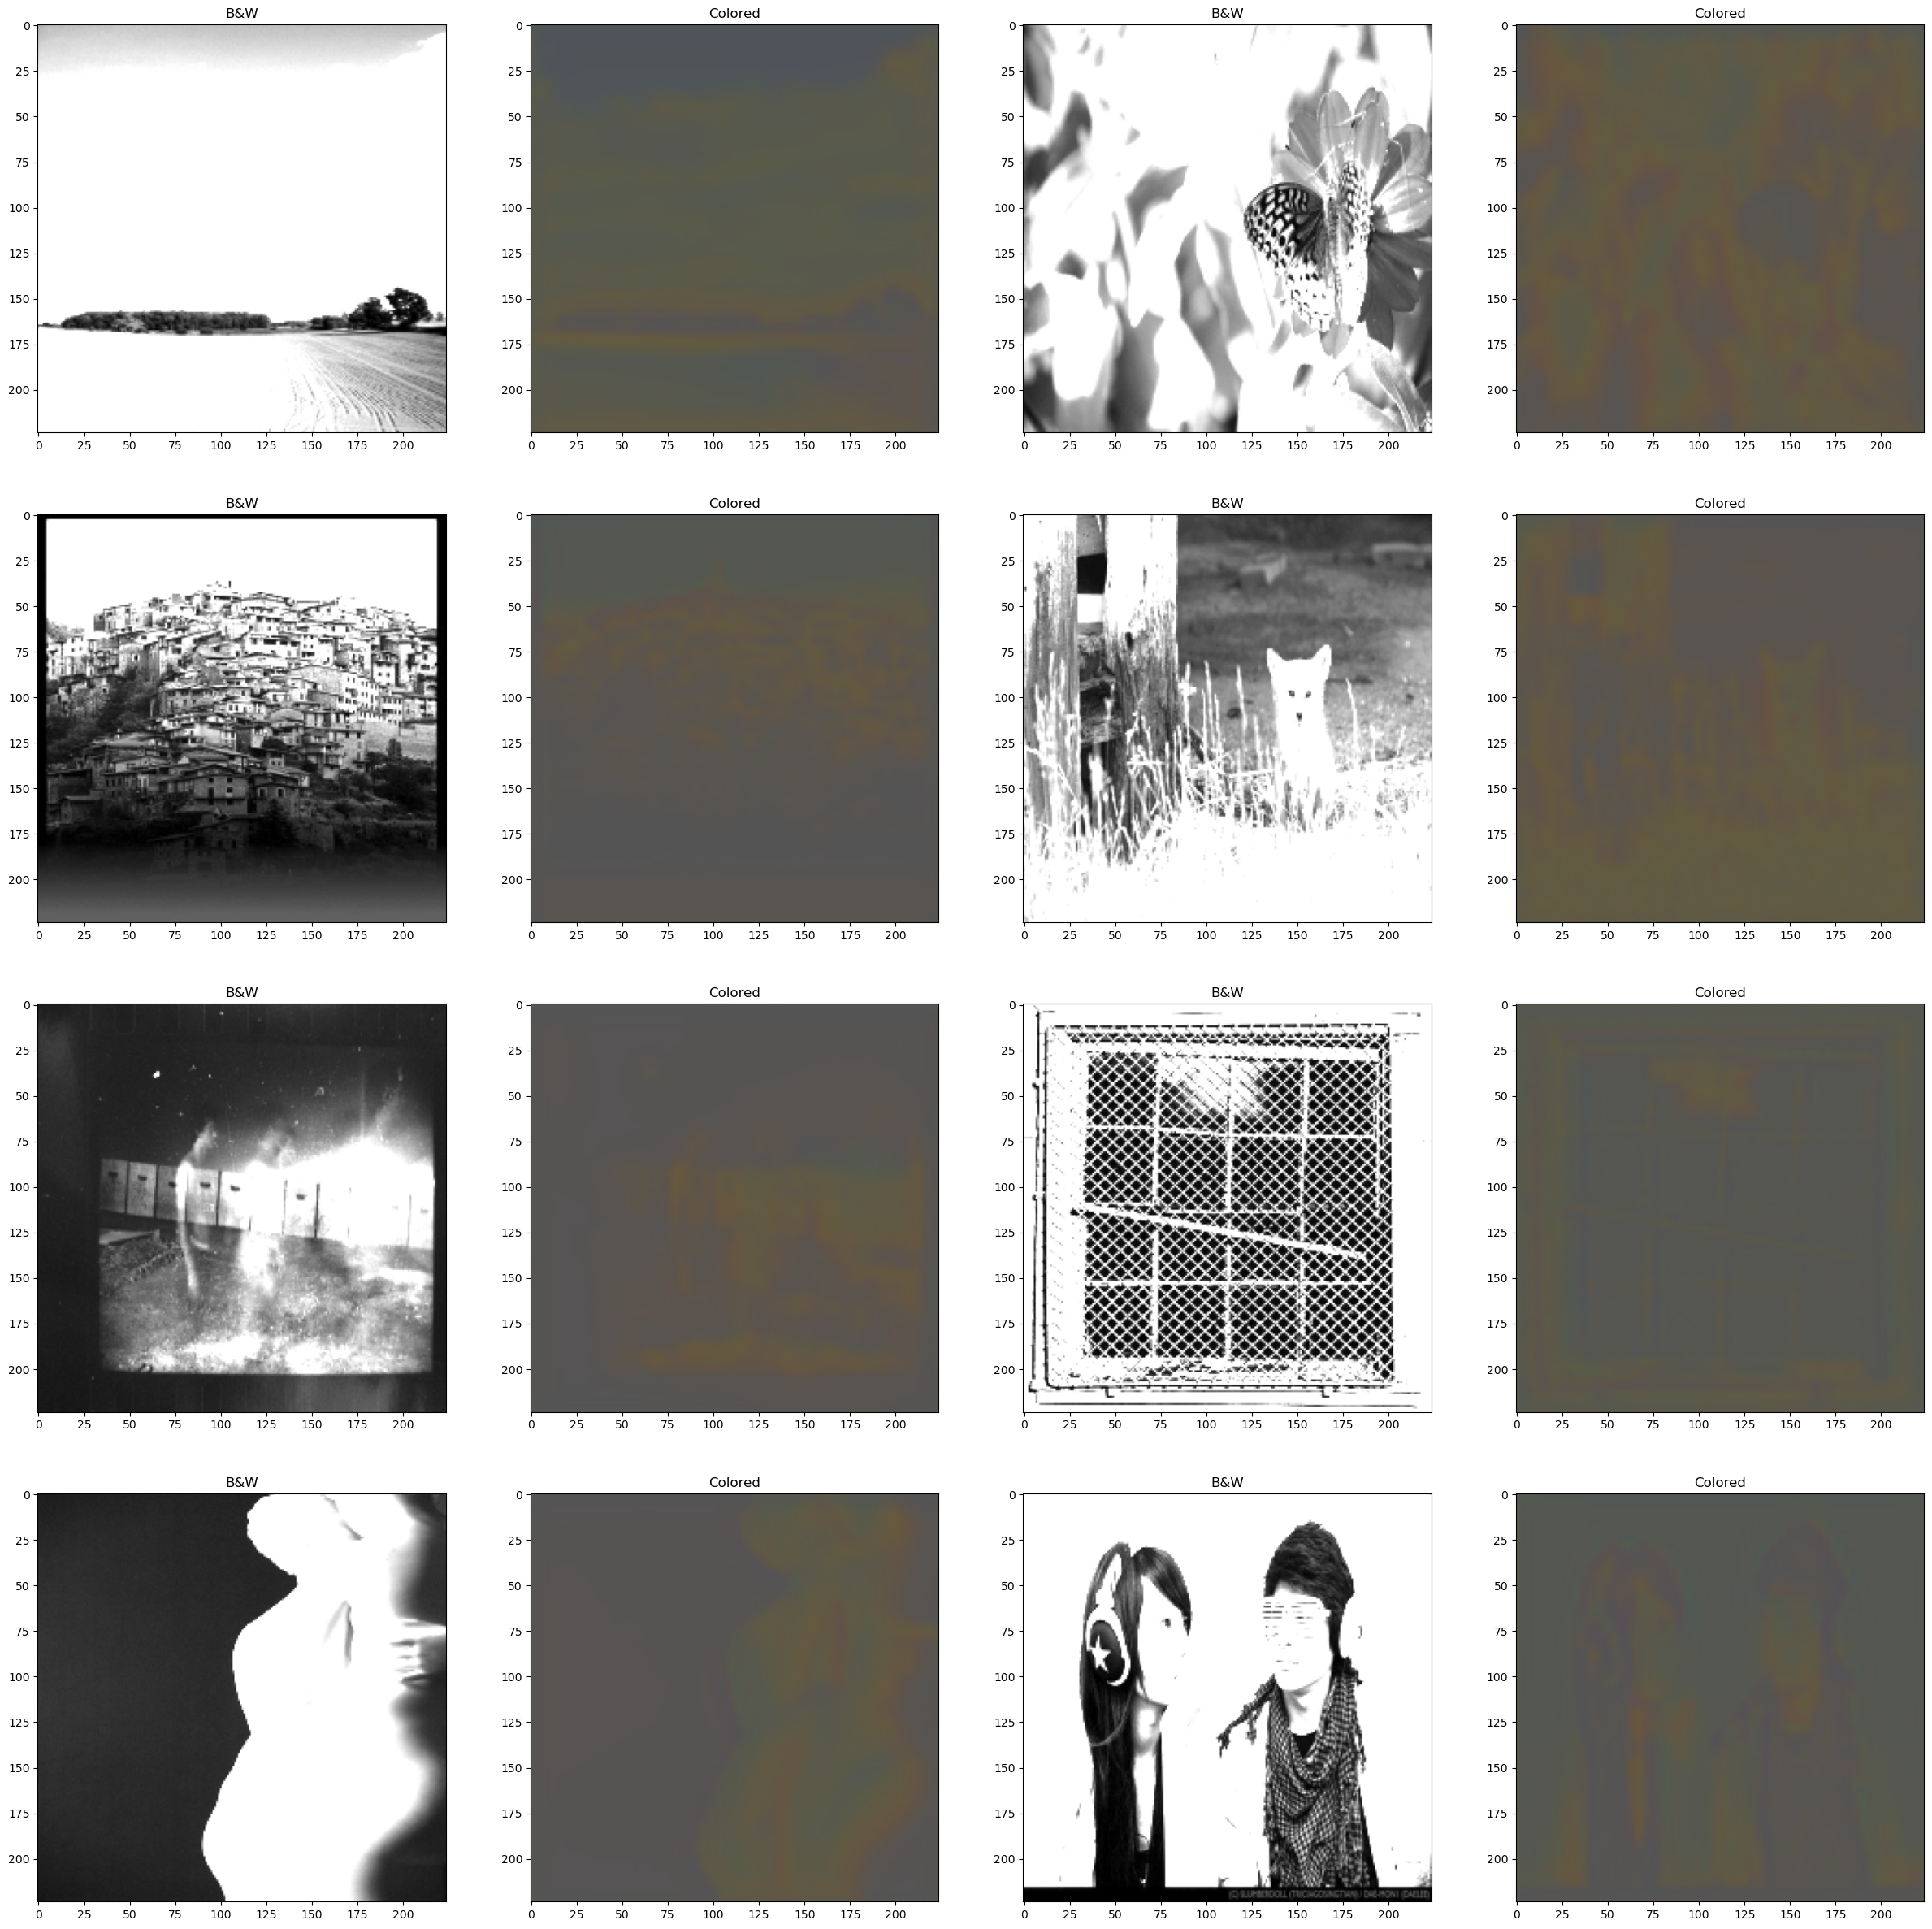

In [29]:
plt.figure(figsize=(30,30))
for i in range(1,16,2):
    plt.subplot(4,4,i)
    img = np.zeros((224,224,3))
    img[:,:,0] = test_x[i]*255
    plt.title('B&W')
    plt.imshow(lab2rgb(img))
    
    plt.subplot(4,4,i+1)
    img = pred[i]*255
    img = img.astype('uint8')
    plt.title('Colored')
    plt.imshow(img)

In [ ]:
plt.figure(figsize=(30,30))
for i in range(1,16,2):
    plt.subplot(4,4,i)
    img = np.zeros((224,224,3))
    img[:,:,0] = test_x[i]*255
    plt.title('B&W')
    plt.imshow(lab2rgb(img))
    
    plt.subplot(4,4,i+1)
    img[:,:,1:] = test_y[i]*255
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    plt.title('Colored')
    plt.imshow(img)

In [ ]:
plt.imshow(pred[2])

In [ ]:
plt.imshow(pred[20])

In [ ]:
model1.save_weights("weightsvaelab.h5")

In [ ]:
model1.load_weights('weights')

In [ ]:
model1.score(test_x, test_y)